In [1]:
# IMPORT ALL DEPENDENCIES

import os
import cv2 as cv
#import matplotlib as mtplt
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np


In [2]:
# DECLARING ALL PATHS AND VARIABLES.

DATA_DIR = "\\".join(os.getcwd().split("\\")[:-1]) + "\\" + "DataSet"
ANNOTATIONS_DIR = DATA_DIR + "\\" + "Annotations\\"
IMG_DIR = DATA_DIR + "\\" + "Images\\"
PROCESSESED_PATH = DATA_DIR + '\\' + 'ProcessedDatasets\\'
AVAILABLE_CLASSES = ['n02089078-black-and-tan_coonhound','n02091831-Saluki','n02092002-Scottish_deerhound','n02095314-wire-haired_fox_terrier']


CLASS_NAMES = []
CLASS_CODES = []
ANNOTATION_PATHS = []
IMAGE_PATHS = []
PROCESSED_IMAGE_PATHS = []


for i in range(4):
    CLASS_NAMES.append("-".join(AVAILABLE_CLASSES[i].split("-")[1:]))
    CLASS_CODES.append(AVAILABLE_CLASSES[i].split("-")[0])
    ANNOTATION_PATHS.append(ANNOTATIONS_DIR + AVAILABLE_CLASSES[i] + "\\" )
    IMAGE_PATHS.append(IMG_DIR + AVAILABLE_CLASSES[i] + "\\")
    PROCESSED_IMAGE_PATHS.append(PROCESSESED_PATH + CLASS_CODES[i]+"-" +CLASS_NAMES[i]+ "\\")

print(IMAGE_PATHS)


['c:\\Users\\kaasa\\Documents\\Data-Mining-1\\DataSet\\Images\\n02089078-black-and-tan_coonhound\\', 'c:\\Users\\kaasa\\Documents\\Data-Mining-1\\DataSet\\Images\\n02091831-Saluki\\', 'c:\\Users\\kaasa\\Documents\\Data-Mining-1\\DataSet\\Images\\n02092002-Scottish_deerhound\\', 'c:\\Users\\kaasa\\Documents\\Data-Mining-1\\DataSet\\Images\\n02095314-wire-haired_fox_terrier\\']


In [20]:
# FUNCTION TO PROCESS THE IMAGE BASED ON THE CORRESPONDING ANNOTATIONS.

def get_bounding_boxes(annot):
  xml = annot
  tree = ET.parse(xml)
  root = tree.getroot()
  objects = root.findall('object')
  bbox = []
  for o in objects:
    bndbox = o.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    bbox.append((xmin,ymin,xmax,ymax))
  return bbox

#FUNCTION TO CROP EVERY IMAGE IN EVERY CLASS AND SAVE IN A PROCESSED DIRECTORY.

def crop_image(image_path , annotation_path,save_path):
  img = cv.imread(image_path)
  bb = get_bounding_boxes(annotation_path)
  bbox = bb[0]
  cropped_data = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]    # cropping the image
  cropped_data = cv.resize(cropped_data,dsize=(331 ,331),interpolation=cv.INTER_CUBIC) # rescaling it to a square image
  crop_img = Image.fromarray(cropped_data,'RGB')  # converting the numpy array to an image
  crop_img.save(save_path)
  


  

In [21]:


for i in range(4):
    for dog in os.listdir(IMAGE_PATHS[i]):
        image_path = dog
        annotation_path = dog.split(".")[0]
        if not os.path.exists(PROCESSED_IMAGE_PATHS[i]):
            os.mkdir(PROCESSED_IMAGE_PATHS[i])
        crop_image(IMAGE_PATHS[i]+  image_path, ANNOTATION_PATHS[i] + annotation_path, PROCESSED_IMAGE_PATHS[i] + dog)



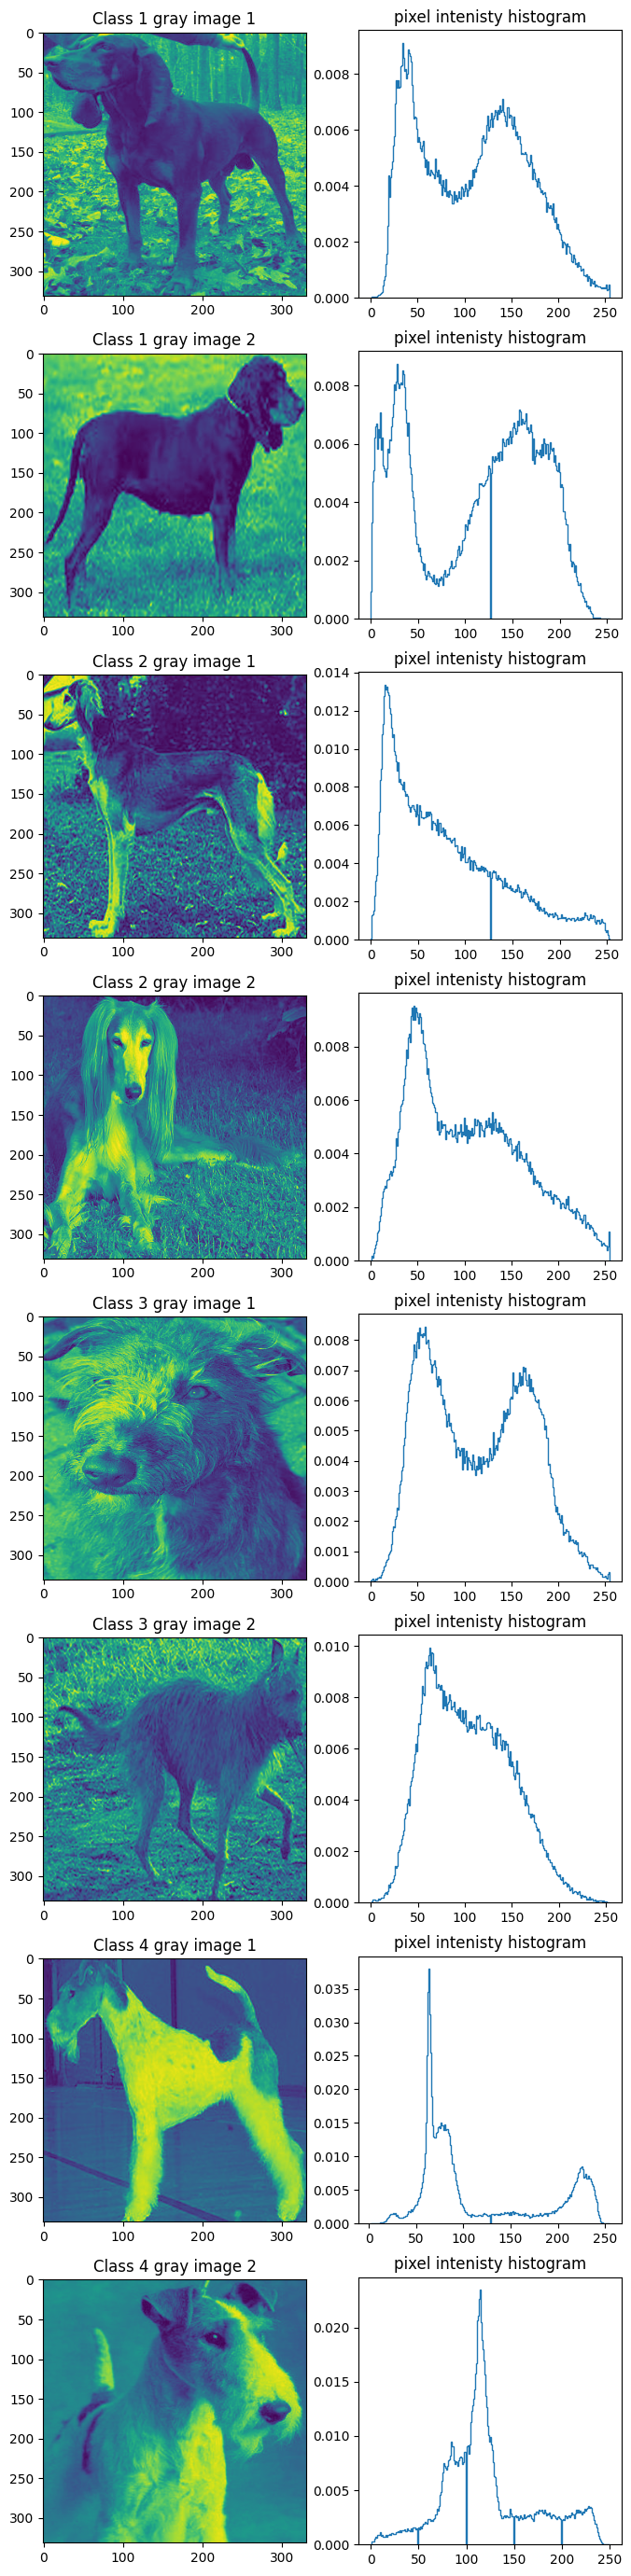

In [76]:
import cv2 as cv
import os

fig = plt.figure(figsize=(8, 35))

rows = 8
columns = 2

for i in range(4):

    img1 = cv.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[2] )
    img2 = cv.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[65] )
    img1_gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
    img2_gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
    arr_1 =img1_gray.flatten()
    arr_2 =img2_gray.flatten()

    fig.add_subplot(rows,columns,4*i+1)
    plt.imshow(img1_gray)
    plt.title("Class "+str(i+1)+" gray image 1")
    fig.add_subplot(rows,columns,2*(2*i+1))
    plt.hist(arr_1,bins=255,histtype='step',density='True')
    plt.title("pixel intenisty histogram")

    fig.add_subplot(rows,columns,4*i+3)
    plt.imshow(img2_gray)
    plt.title("Class "+str(i+1)+" gray image 2")
    fig.add_subplot(rows,columns,4*(i+1))
    plt.hist(arr_2,bins=255,histtype='step',density='True')
    plt.title("pixel intenisty histogram")
    



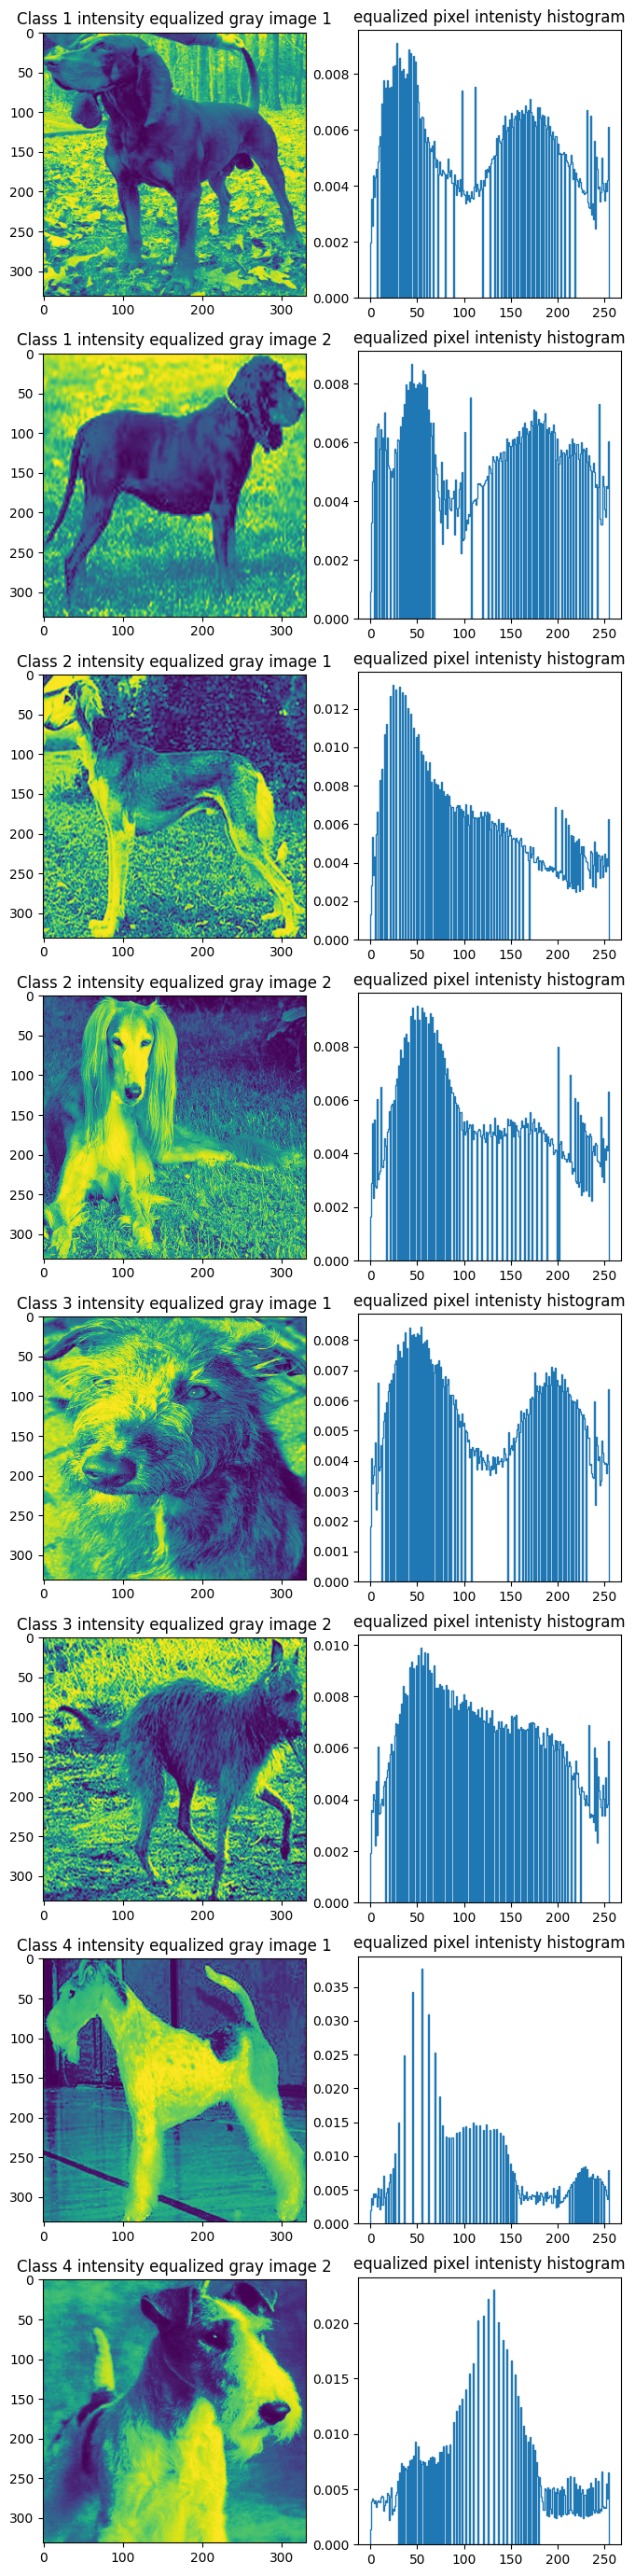

In [77]:
fig = plt.figure(figsize=(8, 35))

rows = 8
columns = 2

for i in range(4):

    img1 = cv.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[2] )
    img2 = cv.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[65] )
    
    img1_gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
    img2_gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
    img1_eq = cv.equalizeHist(img1_gray)
    img2_eq = cv.equalizeHist(img2_gray)
    arr_1 =img1_eq.flatten()
    arr_2 =img2_eq.flatten()

    fig.add_subplot(rows,columns,4*i+1)
    plt.imshow(img1_eq)
    plt.title("Class "+str(i+1)+" intensity equalized gray image 1")
    fig.add_subplot(rows,columns,2*(2*i+1))
    plt.hist(arr_1,bins=255,density='True',histtype='step')
    plt.title("equalized pixel intenisty histogram")

    fig.add_subplot(rows,columns,4*i+3)
    plt.imshow(img2_eq)
    plt.title("Class "+str(i+1)+" intensity equalized gray image 2")
    fig.add_subplot(rows,columns,4*(i+1))
    plt.hist(arr_2,bins=255,density='True',histtype='step')
    plt.title("equalized pixel intenisty histogram")
    

